<a href="https://colab.research.google.com/github/K1ngHungry/DataScienceClub/blob/main/Machine%20Learning/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In Depth: Linear Regression

We begin with the standard imports:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

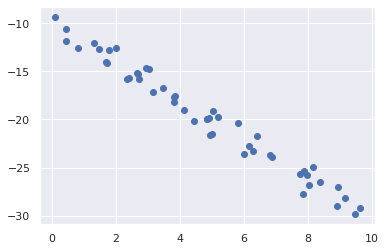

In [8]:
rng = np.random.RandomState(23482987)
x = 10 * rng.rand(50)
y = -2 * x - 10 + 1*rng.randn(50)
plt.scatter(x, y);

In [9]:
10*rng.rand(50)

array([4.13432671, 1.73239726, 7.49927255, 3.3311196 , 8.92073528,
       8.55287073, 2.70360016, 1.56733232, 4.06089615, 0.09019338,
       5.24066319, 1.50995319, 9.51558386, 5.91160571, 4.62314927,
       8.75443829, 0.20037207, 9.72822971, 5.93119186, 5.69018924,
       1.74403933, 0.75996116, 1.02610962, 4.98416094, 1.59431533,
       6.97498523, 1.14949953, 0.55380859, 6.98253531, 6.378835  ,
       8.13723969, 5.56749642, 5.44714081, 1.39662613, 1.7882957 ,
       2.48440624, 8.72911435, 2.2232328 , 7.70052105, 7.64948769,
       4.38682783, 8.33898233, 8.6021946 , 6.83272625, 4.91575346,
       4.47281924, 8.46854215, 6.49588796, 4.17544315, 7.88692273])

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

Documentation: https://scikit-learn.org/0.21/documentation.html

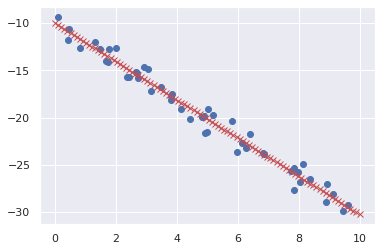

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 100) #linspace spaces out the data evenly
yfit = model.predict(xfit[:, np.newaxis]) # newaxis reshapes the array

plt.scatter(x, y)
plt.plot(xfit, yfit,'rx'); #rx makes it red

In [11]:
model.intercept_

-10.028439777417626

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore.
Here the relevant parameters are ``coef_`` and ``intercept_``:

In [12]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     -2.0225139628803652
Model intercept: -10.028439777417626


We see that the results are very close to the inputs, as we might hope.

The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [13]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single ``LinearRegression`` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

<AxesSubplot:xlabel='Height', ylabel='Weight'>

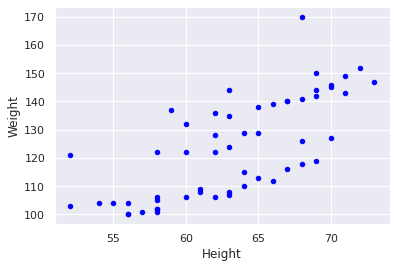

In [24]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/K1ngHungry/DataScienceClub/main/Height%20Weight%20Data.csv')
data.plot.scatter(x='Height', y='Weight', alpha=1, color='blue')

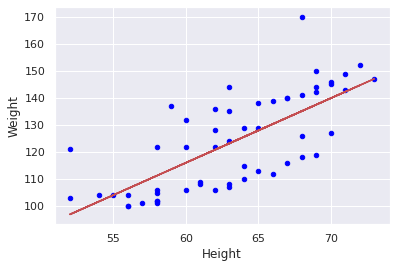

In [25]:
# Creating a Linear Regression model on our data
model = LinearRegression()
model.fit(data[['Height']], data['Weight'])
# Creating a plot
ax = data.plot.scatter(x='Height', y='Weight', alpha=1, color='blue')
ax.plot(data['Height'], model.predict(data[['Height']]), c='r')

In [26]:
model.score(data[['Height']], data['Weight'])

0.5271960827234733